In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow import keras

In [2]:
# Cargamos el dataset
dataset = pd.read_csv('wine.data', header=None,skiprows=1)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#  Ahora vamos a separar los datos de entrenamiento y los datos de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 1:], dataset.iloc[:, 0], test_size=0.35)

len(dataset),len(X_train),len(X_test)

(178, 115, 63)

In [4]:
# Normalizamos nuestros conjuntos de datos
X_train_mean = X_train.mean()   
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std

X_test_mean = X_test.mean()
X_test_std = X_test.std()
X_test = (X_test - X_test_mean) / X_test_std




In [5]:
y_train.head()

3      1
157    3
83     2
77     2
113    2
Name: 0, dtype: int64

In [6]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
3,1.648319,-0.281884,0.460653,-0.715668,0.700574,2.389598,1.413674,-0.937953,0.923045,1.129950,-0.462695,1.190827,2.270797
157,-0.656906,0.742099,0.926222,2.277126,-0.308077,-0.675829,-1.475224,2.088464,-0.805677,1.003080,-1.308286,-1.242495,0.359002
83,0.063477,1.529049,-0.137936,0.956776,-1.064565,-1.068833,-0.472548,1.933263,-0.007805,-0.138748,-0.551705,-0.846373,-0.804007
77,-1.389295,0.609361,-0.437230,-0.363575,0.637533,-0.958792,-0.740590,0.536455,-1.121501,-1.047981,-0.017647,-0.124865,-0.851802
113,-1.905569,-1.429124,0.460653,0.516659,-0.875443,0.235939,-0.055594,0.458855,-0.307007,-0.866134,0.605420,-0.421956,-1.062099


In [7]:
# X_train = np.array(X_train)
# y_train = np.array(y_train)

In [8]:
len(X_train),len(y_train)

(115, 115)

In [9]:
model = Sequential([
    Dense(13),
    Dense(5, activation="sigmoid"),
    Dense(5, activation="sigmoid"),
    Dense(1, activation="softmax")
])

In [10]:
model.build(input_shape=(None, 13))


In [11]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
# Probaremos varios optimizadores
# model.compile(optimizer=("sgd", "rmsprop", "adagrad", "adadelta", "adam", "adamax", "nadam"),
from tensorflow.keras.optimizers import Adam, SGD
model.compile(optimizer=SGD(learning_rate=0.1),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
history_small_model=model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/100


C:\Users\pepe2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


7/7 - 1s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 797ms/epoch - 114ms/step
Epoch 2/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 43ms/epoch - 6ms/step
Epoch 3/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 47ms/epoch - 7ms/step


C:\Users\pepe2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


Epoch 4/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 45ms/epoch - 6ms/step
Epoch 5/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 45ms/epoch - 6ms/step
Epoch 6/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 45ms/epoch - 6ms/step
Epoch 7/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 44ms/epoch - 6ms/step
Epoch 8/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 46ms/epoch - 7ms/step
Epoch 9/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 42ms/epoch - 6ms/step
Epoch 10/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accuracy: 0.2500 - 83ms/epoch - 12ms/step
Epoch 11/100
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.3689 - val_loss: 0.0000e+00 - val_accura

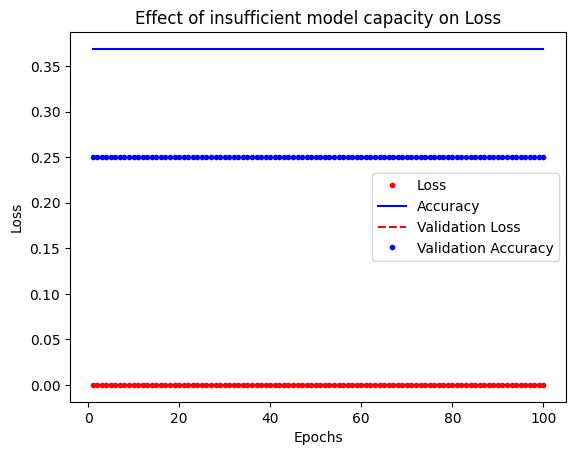

In [14]:
loss = history_small_model.history["loss"]
epochs = range(1, 101)
acc = history_small_model.history["accuracy"]

plt.plot(epochs, loss, "r.",label="Loss")
plt.plot(epochs,acc, "b",label="Accuracy")
plt.plot(epochs, history_small_model.history["val_loss"], "r--",label="Validation Loss")
plt.plot(epochs, history_small_model.history["val_accuracy"], "b.",label="Validation Accuracy")
plt.title("Effect of insufficient model capacity on Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()